In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Paris_Private-Room.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0      id                          listing_url  \
0            15          15   12268   https://www.airbnb.com/rooms/12268   
1            41          41   12887   https://www.airbnb.com/rooms/12887   
2            43          43   16626   https://www.airbnb.com/rooms/16626   
3            50          50   22158   https://www.airbnb.com/rooms/22158   
4            53          53  252525  https://www.airbnb.com/rooms/252525   

  last_scraped                                        description  host_id  \
0   2024-09-10                                                NaN    47196   
1   2024-09-12  Welcome to Paradise !<br />Central Paris with ...    49798   
2   2024-09-12  Beautiful XV century "hotel particulier". This...    64627   
3   2024-09-11  Welcome to this very cosy and quiet artist lof...    84874   
4   2024-09-13  Nice and sunny bedroom in a duplex appartemnen...  1164453   

                                    host_url  host_since  host_response_time  \
0    https://www.airbnb.com/users/show/47196  2009-10-20      within an hour   
1    https://www.airbnb.com/users/show/49798  2009-10-30      within an hour   
2    https://www.airbnb.com/users/show/64627  2009-12-20      within an hour   
3    https://www.airbnb.com/users/show/84874  2010-02-24  within a few hours   
4  https://www.airbnb.com/users/show/1164453  2011-09-15      within an hour   

   ... review_scores_checkin review_scores_communication  \
0  ...                  4.80                        4.83   
1  ...                  4.81                        4.84   
2  ...                  4.84                        4.86   
3  ...                  4.99                        4.98   
4  ...                  4.76                        4.85   

  review_scores_location        license  instant_bookable  \
0                   4.81  7510402838018                 f   
1                   4.79  7510402838018                 t   
2                   4.97  7510402838018                 f   
3                   4.98  7510402838018                 f   
4                   4.96  7510200798302                 f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                              2                                           0   
2                              2                                           1   
3                              1                                           0   
4                              2                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            2   
2                                            1   
3                                            1   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.01  
1                                           0              0.68  
2                                           0              0.91  
3                                           0              0.72  
4                                           0              3.88  

[5 rows x 52 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

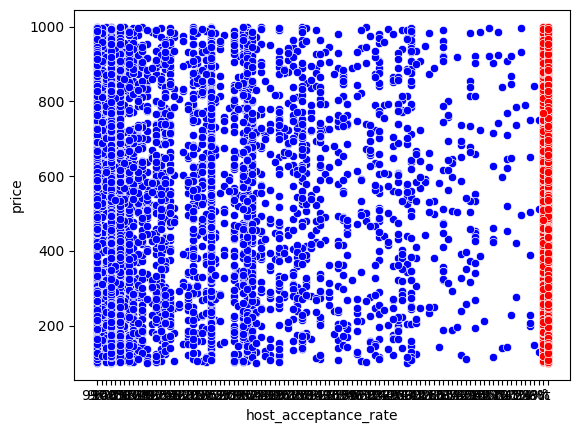

In [114]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [115]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [117]:
type(model)

sklearn.linear_model._base.LinearRegression

In [118]:
# Identificar columnas que contienen valores en formato de porcentaje
percentage_columns = [col for col in df.select_dtypes(include=['object']).columns 
                      if df[col].astype(str).str.contains('%').any()]

# Convertir valores de porcentaje a decimal
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '', regex=True)  # Eliminar '%'
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100  # Convertir a número en decimal

# Verificar que la conversión fue exitosa
print("Columnas convertidas a decimal:", percentage_columns)
print(df[percentage_columns].head())  # Muestra los primeros valores convertidos

Columnas convertidas a decimal: ['description', 'host_response_rate', 'host_acceptance_rate']
   description  host_response_rate  host_acceptance_rate
0          NaN                 NaN                   NaN
1          NaN                 1.0                  0.99
2          NaN                 0.8                  0.96
3          NaN                 1.0                  0.94
4          NaN                 1.0                  1.00


In [119]:
# Reemplazar 'Entire home/apt' por el número 1 en todas las columnas donde aparezca
df = df.replace('Private Room', 2)

# Verificar si el reemplazo fue exitoso
print(df.head())

   Unnamed: 0.1  Unnamed: 0      id                          listing_url  \
0            15          15   12268   https://www.airbnb.com/rooms/12268   
1            41          41   12887   https://www.airbnb.com/rooms/12887   
2            43          43   16626   https://www.airbnb.com/rooms/16626   
3            50          50   22158   https://www.airbnb.com/rooms/22158   
4            53          53  252525  https://www.airbnb.com/rooms/252525   

  last_scraped  description  host_id  \
0   2024-09-10          NaN    47196   
1   2024-09-12          NaN    49798   
2   2024-09-12          NaN    64627   
3   2024-09-11          NaN    84874   
4   2024-09-13          NaN  1164453   

                                    host_url  host_since  host_response_time  \
0    https://www.airbnb.com/users/show/47196  2009-10-20      within an hour   
1    https://www.airbnb.com/users/show/49798  2009-10-30      within an hour   
2    https://www.airbnb.com/users/show/64627  2009-12-20      

In [122]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN



float64
0


In [123]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [124]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-89381.36899076]),
 'rank_': 1,
 'singular_': array([0.00430498]),
 'intercept_': np.float64(552.9241612635869)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00024061642353734314

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([552.92416126, 544.07540573, 544.34354984, ..., 545.05860079,
       544.52231258, 543.98602436], shape=(9055,))

In [ ]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0                   id  \
0       552.924161            15          15                12268   
1       544.075406            41          41                12887   
2       544.343550            43          43                16626   
3       544.522313            50          50                22158   
4       543.986024            53          53               252525   
...            ...           ...         ...                  ...   
9050    543.986024         95416       95416  1236998244796562295   
9051    546.220559         95421       95421  1237716505313127669   
9052    545.058601         95429       95429  1238201820642240481   
9053    544.522313         95432       95432  1238213733825019086   
9054    543.986024         95454       95454  1238526790698665681   

                                           listing_url last_scraped  \
0                   https://www.airbnb.com/rooms/12268   2024-09-10   
1                   https://www.airbnb.com/rooms/12887   2024-09-12   
2                   https://www.airbnb.com/rooms/16626   2024-09-12   
3                   https://www.airbnb.com/rooms/22158   2024-09-11   
4                  https://www.airbnb.com/rooms/252525   2024-09-13   
...                                                ...          ...   
9050  https://www.airbnb.com/rooms/1236998244796562295   2024-09-10   
9051  https://www.airbnb.com/rooms/1237716505313127669   2024-09-11   
9052  https://www.airbnb.com/rooms/1238201820642240481   2024-09-12   
9053  https://www.airbnb.com/rooms/1238213733825019086   2024-09-13   
9054  https://www.airbnb.com/rooms/1238526790698665681   2024-09-13   

      description    host_id                                     host_url  \
0             0.0      47196      https://www.airbnb.com/users/show/47196   
1             0.0      49798      https://www.airbnb.com/users/show/49798   
2             0.0      64627      https://www.airbnb.com/users/show/64627   
3             0.0      84874      https://www.airbnb.com/users/show/84874   
4             0.0    1164453    https://www.airbnb.com/users/show/1164453   
...           ...        ...                                          ...   
9050          0.0  519135431  https://www.airbnb.com/users/show/519135431   
9051          0.0  572436120  https://www.airbnb.com/users/show/572436120   
9052          0.0   15023801   https://www.airbnb.com/users/show/15023801   
9053          0.0  430904055  https://www.airbnb.com/users/show/430904055   
9054          0.0   70113351   https://www.airbnb.com/users/show/70113351   

      host_since  ... review_scores_checkin  review_scores_communication  \
0     2009-10-20  ...                  4.80                         4.83   
1     2009-10-30  ...                  4.81                         4.84   
2     2009-12-20  ...                  4.84                         4.86   
3     2010-02-24  ...                  4.99                         4.98   
4     2011-09-15  ...                  4.76                         4.85   
...          ...  ...                   ...                          ...   
9050  2023-06-09  ...                  4.80                         4.83   
9051  2024-04-15  ...                  4.80                         4.83   
9052  2014-05-02  ...                  5.00                         5.00   
9053  2021-11-08  ...                  4.80                         4.83   
9054  2016-05-03  ...                  4.80                         4.83   

      review_scores_location        license  instant_bookable  \
0                       4.81  7510402838018                 f   
1                       4.79  7510402838018                 t   
2                       4.97  7510402838018                 f   
3                       4.98  7510402838018                 f   
4                       4.96  7510200798302                 f   
...                      ...            ...               ...   
9050                    4.81  7

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

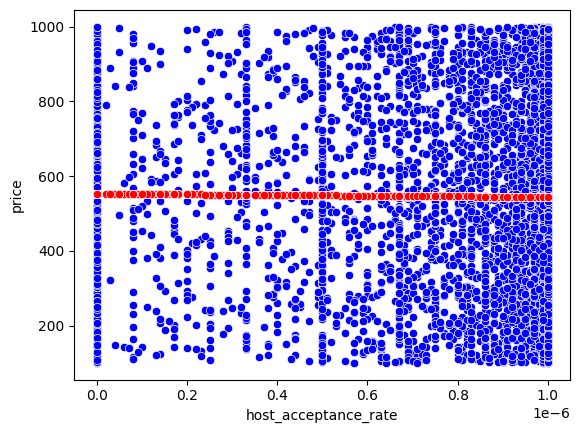

In [ ]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

In [ ]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00024061642353734314

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.015511815610602877)

In [ ]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_18932\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [ ]:
df['room_type'] = 2

In [ ]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

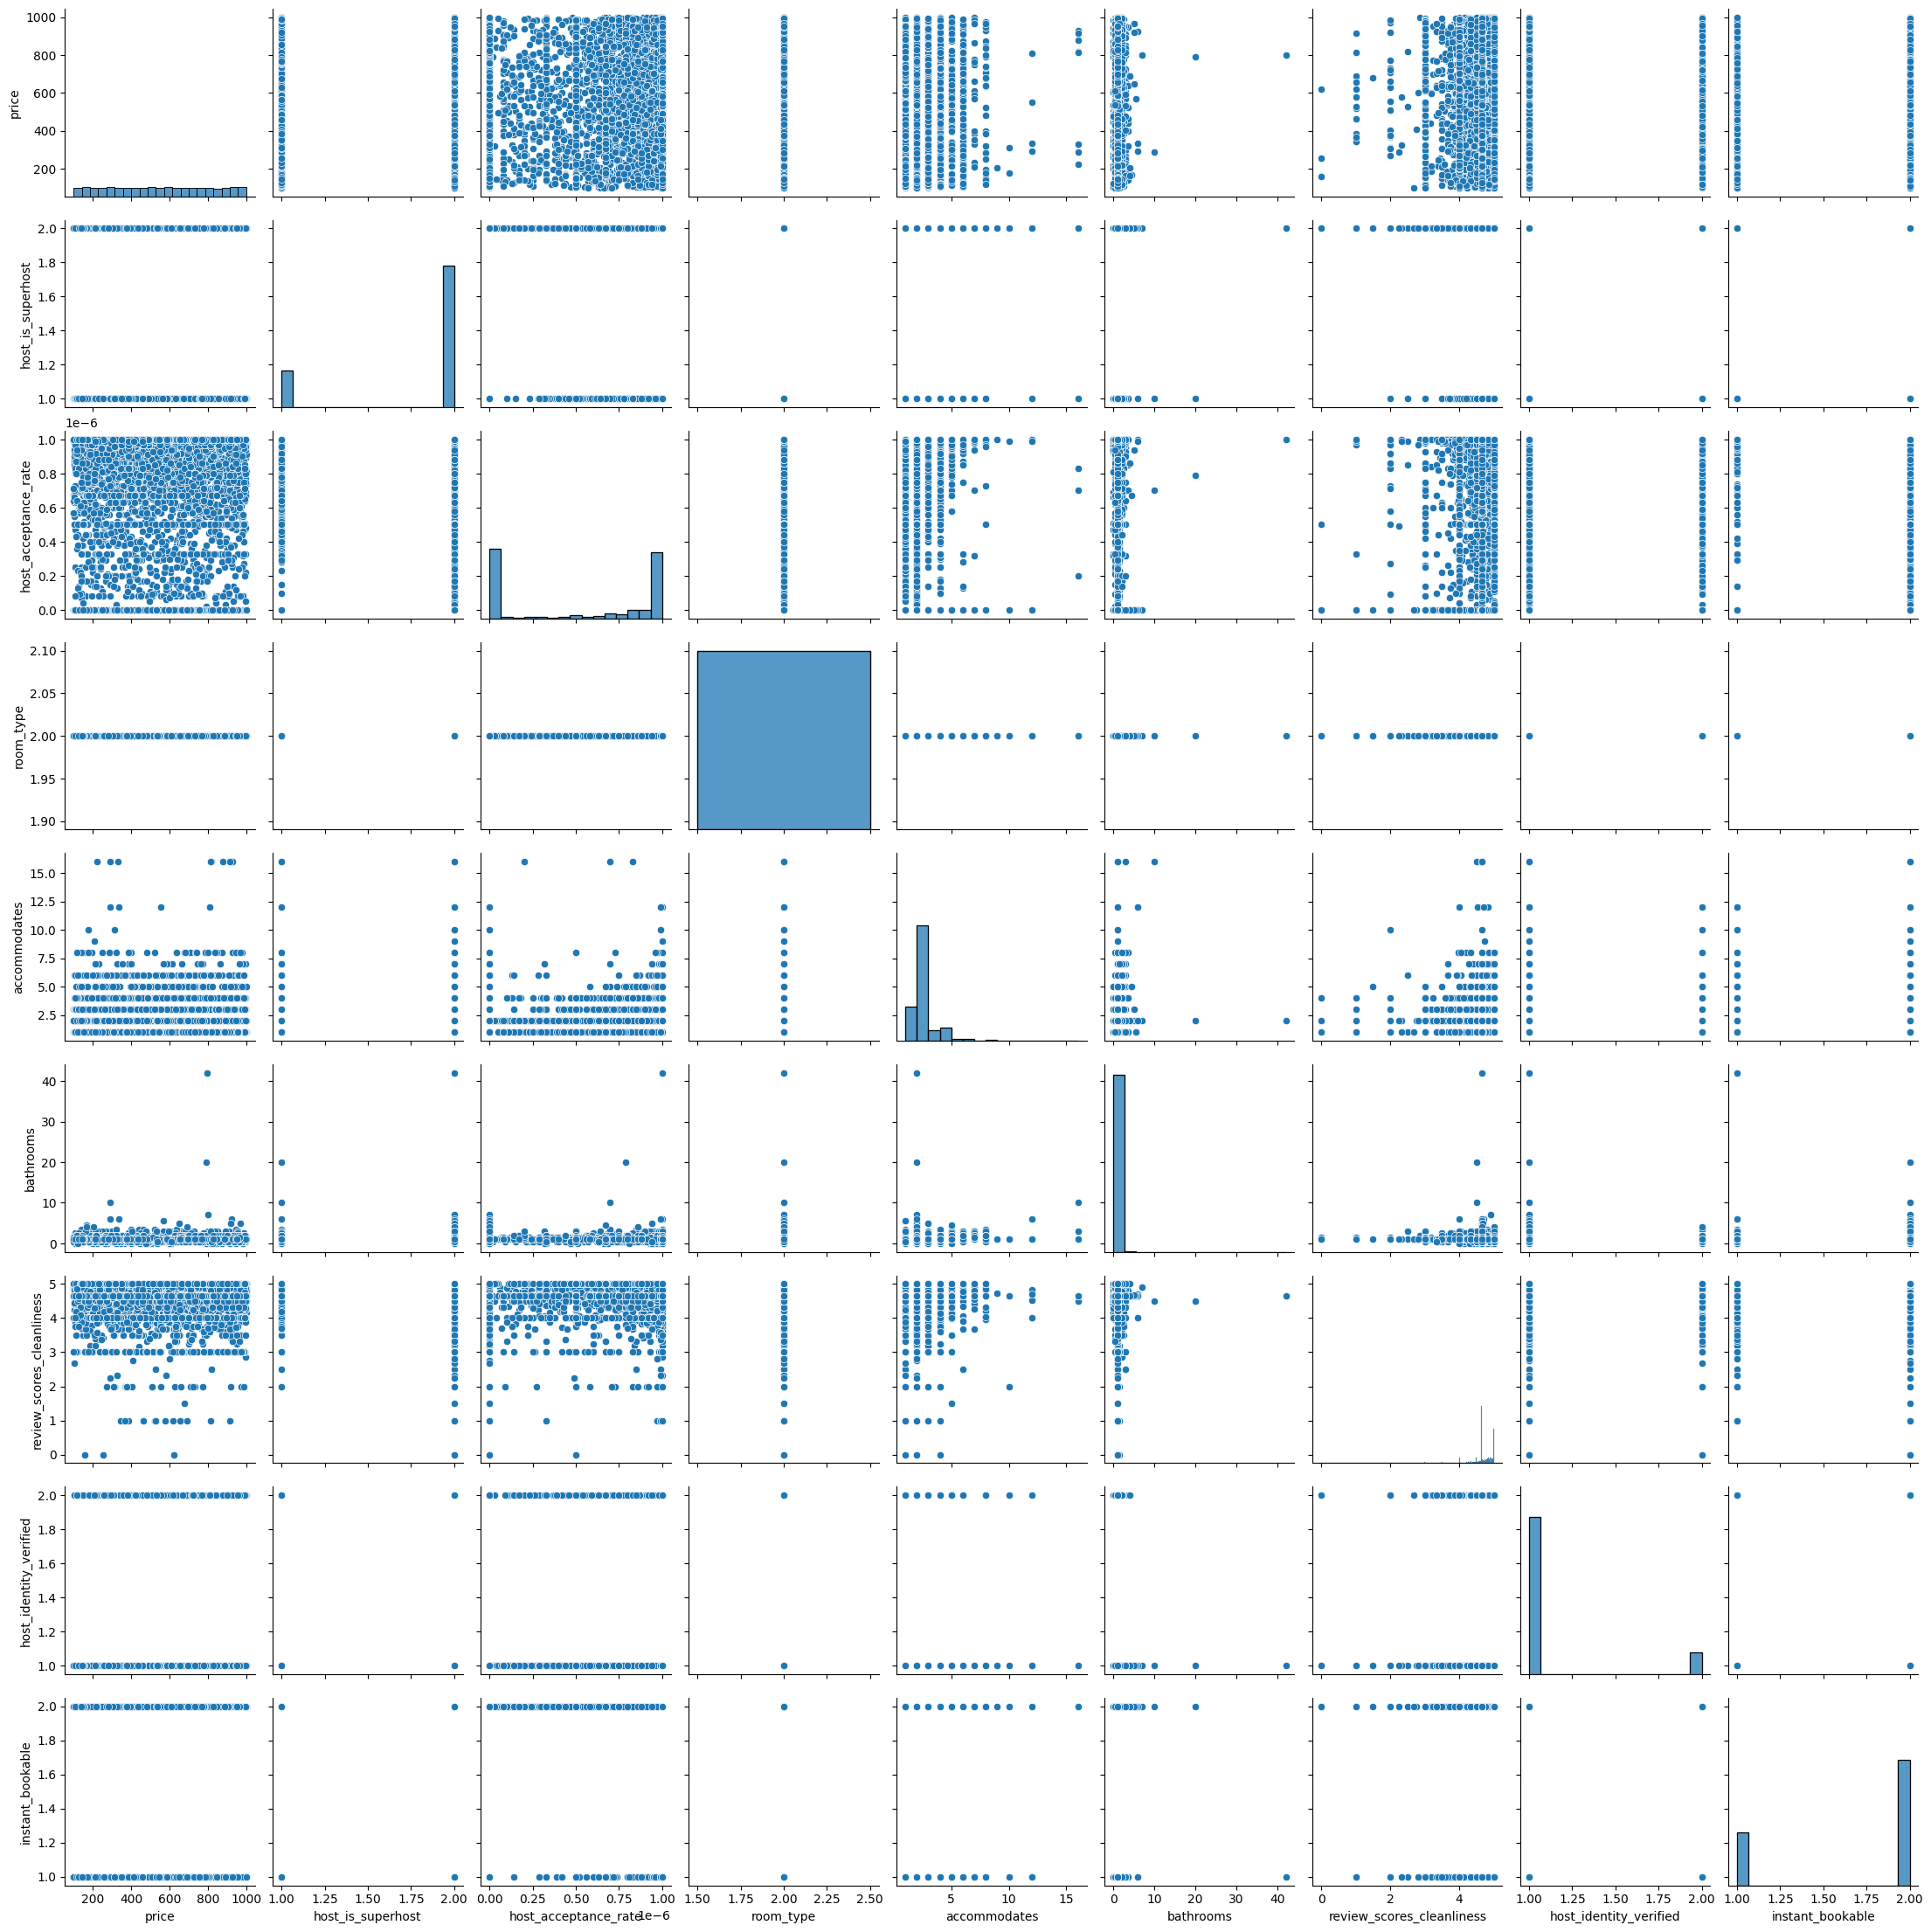

In [ ]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [ ]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.022742             -0.015512   
host_is_superhost          0.022742           1.000000             -0.421832   
host_acceptance_rate      -0.015512          -0.421832              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates              -0.003733          -0.073391              0.107478   
bathrooms                  0.013734          -0.043898              0.052222   
review_scores_cleanliness -0.005255          -0.187535              0.086426   
host_identity_verified    -0.002959           0.155527             -0.275334   
instant_bookable          -0.005737           0.014530             -0.288362   

                           room_type  accommodates  bathrooms  \
price                            NaN     -0.003733   0.013734   
host_is_superhost                NaN     -0.073391  -0.043898   
host_acceptance_rate             NaN      0.107478   0.052222   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.148822   
bathrooms                        NaN      0.148822   1.000000   
review_scores_cleanliness        NaN     -0.017958   0.000211   
host_identity_verified           NaN     -0.036001  -0.029732   
instant_bookable                 NaN     -0.076196  -0.021803   

                           review_scores_cleanliness  host_identity_verified  \
price                                      -0.005255               -0.002959   
host_is_superhost                          -0.187535                0.155527   
host_acceptance_rate                        0.086426               -0.275334   
room_type                                        NaN                     NaN   
accommodates                               -0.017958               -0.036001   
bathrooms                                   0.000211               -0.029732   
review_scores_cleanliness                   1.000000               -0.025829   
host_identity_verified                     -0.025829                1.000000   
instant_bookable                            0.039365                0.116523   

                           instant_bookable  
price                             -0.005737  
host_is_superhost                  0.014530  
host_acceptance_rate              -0.288362  
room_type                               NaN  
accommodates                      -0.076196  
bathrooms                         -0.021803  
review_scores_cleanliness          0.039365  
host_identity_verified             0.116523  
instant_bookable                   1.000000

In [ ]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.022742              0.015512   
host_is_superhost          0.022742           1.000000              0.421832   
host_acceptance_rate       0.015512           0.421832              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.003733           0.073391              0.107478   
bathrooms                  0.013734           0.043898              0.052222   
review_scores_cleanliness  0.005255           0.187535              0.086426   
host_identity_verified     0.002959           0.155527              0.275334   
instant_bookable           0.005737           0.014530              0.288362   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.003733   0.013734   
host_is_superhost                NaN      0.073391   0.043898   
host_acceptance_rate             NaN      0.107478   0.052222   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.148822   
bathrooms                        NaN      0.148822   1.000000   
review_scores_cleanliness        NaN      0.017958   0.000211   
host_identity_verified           NaN      0.036001   0.029732   
instant_bookable                 NaN      0.076196   0.021803   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.005255                0.002959   
host_is_superhost                           0.187535                0.155527   
host_acceptance_rate                        0.086426                0.275334   
room_type                                        NaN                     NaN   
accommodates                                0.017958                0.036001   
bathrooms                                   0.000211                0.029732   
review_scores_cleanliness                   1.000000                0.025829   
host_identity_verified                      0.025829                1.000000   
instant_bookable                            0.039365                0.116523   

                           instant_bookable  
price                              0.005737  
host_is_superhost                  0.014530  
host_acceptance_rate               0.288362  
room_type                               NaN  
accommodates                       0.076196  
bathrooms                          0.021803  
review_scores_cleanliness          0.039365  
host_identity_verified             0.116523  
instant_bookable                   1.000000

<Axes: >

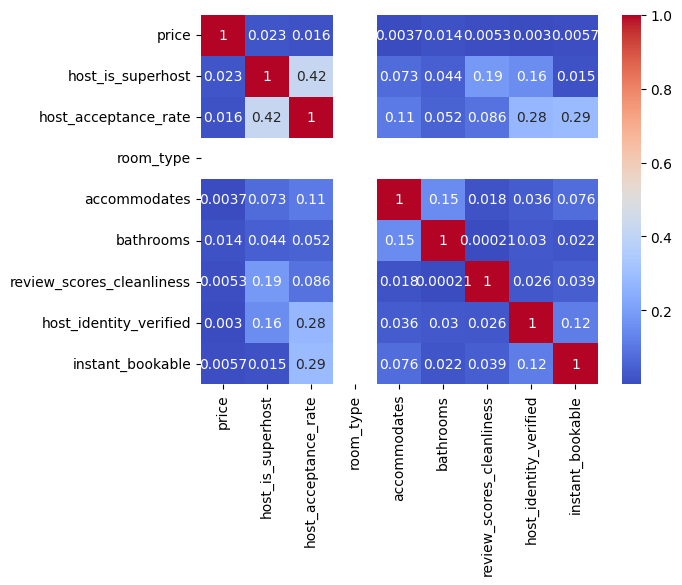

In [ ]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

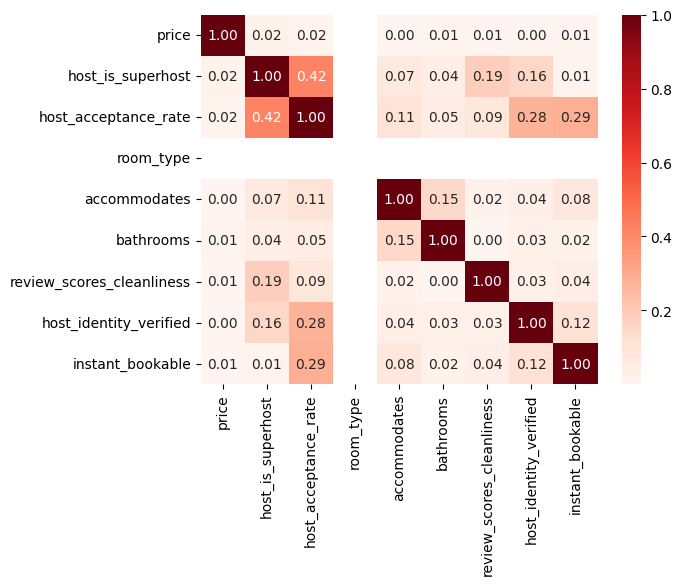

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

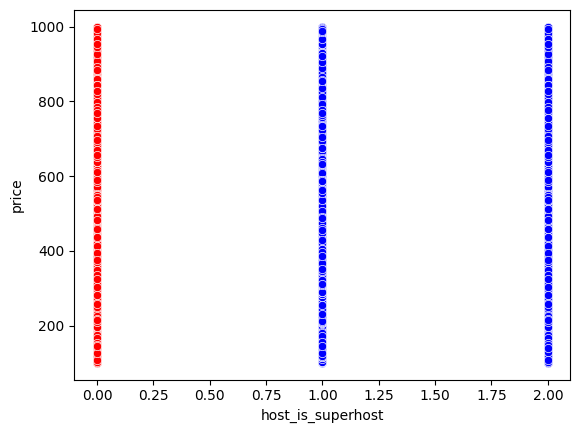

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [ ]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([14.67733015]),
 'rank_': 1,
 'singular_': array([38.43625313]),
 'intercept_': np.float64(521.8902438155966)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0005172075461132852

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([551.24490411, 551.24490411, 536.56757396, ..., 551.24490411,
       551.24490411, 551.24490411], shape=(9055,))

In [ ]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  \
0       551.244904  794.75                  2          0.000000e+00   
1       551.244904  130.44                  2          9.900000e-07   
2       536.567574  932.14                  1          9.600000e-07   
3       536.567574  365.00                  1          9.400000e-07   
4       536.567574  400.39                  1          1.000000e-06   
...            ...     ...                ...                   ...   
9050    551.244904  302.36                  2          1.000000e-06   
9051    551.244904  435.70                  2          7.500000e-07   
9052    551.244904  281.52                  2          8.800000e-07   
9053    551.244904  611.43                  2          9.400000e-07   
9054    551.244904  952.54                  2          1.000000e-06   

      room_type  accommodates  bathrooms  review_scores_cleanliness  \
0             2             2        1.0                       4.65   
1             2             2        1.0                       4.68   
2             2             4        1.5                       4.80   
3             2             2        1.0                       4.85   
4             2             1        2.0                       4.64   
...         ...           ...        ...                        ...   
9050          2             2        1.0                       4.65   
9051          2             1        1.0                       4.65   
9052          2             2        1.0                       5.00   
9053          2             1        0.5                       4.65   
9054          2             4        1.0                       4.65   

      host_identity_verified  instant_bookable  
0                          2                 2  
1                          1                 1  
2                          1                 2  
3                          1                 2  
4                          1                 2  
...                      ...               ...  
9050                       1                 2  
9051                       1                 2  
9052                       1                 2  
9053                       1                 2  
9054                       1                 2  

[9055 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

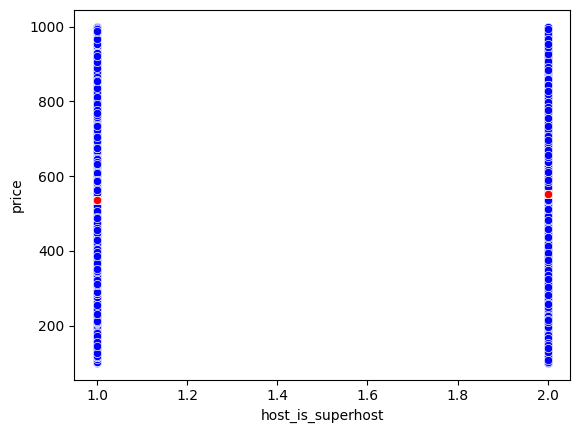

In [ ]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [ ]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0005172075461132852

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.022742197477668803)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

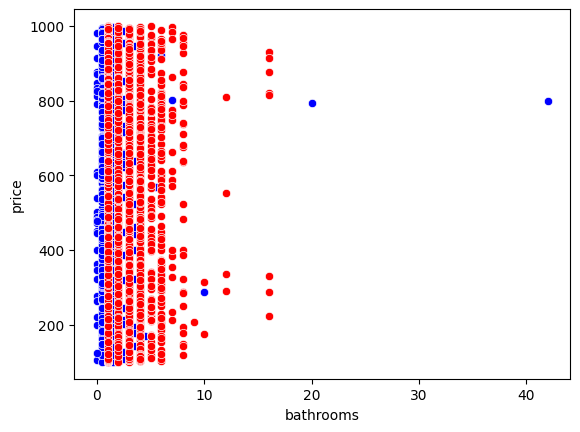

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [ ]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.23059588]),
 'rank_': 1,
 'singular_': array([54.67783109]),
 'intercept_': np.float64(541.5930050704584)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00018861245245682667

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([547.82360095, 547.82360095, 550.9388989 , ..., 547.82360095,
       544.70830301, 547.82360095], shape=(9055,))

In [ ]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0        547.823601    551.244904  794.75                  2   
1        547.823601    551.244904  130.44                  2   
2        550.938899    536.567574  932.14                  1   
3        547.823601    536.567574  365.00                  1   
4        554.054197    536.567574  400.39                  1   
...             ...           ...     ...                ...   
9050     547.823601    551.244904  302.36                  2   
9051     547.823601    551.244904  435.70                  2   
9052     547.823601    551.244904  281.52                  2   
9053     544.708303    551.244904  611.43                  2   
9054     547.823601    551.244904  952.54                  2   

      host_acceptance_rate  room_type  accommodates  bathrooms  \
0             0.000000e+00          2             2        1.0   
1             9.900000e-07          2             2        1.0   
2             9.600000e-07          2             4        1.5   
3             9.400000e-07          2             2        1.0   
4             1.000000e-06          2             1        2.0   
...                    ...        ...           ...        ...   
9050          1.000000e-06          2             2        1.0   
9051          7.500000e-07          2             1        1.0   
9052          8.800000e-07          2             2        1.0   
9053          9.400000e-07          2             1        0.5   
9054          1.000000e-06          2             4        1.0   

      review_scores_cleanliness  host_identity_verified  instant_bookable  
0                          4.65                       2                 2  
1                          4.68                       1                 1  
2                          4.80                       1                 2  
3                          4.85                       1                 2  
4                          4.64                       1                 2  
...                         ...                     ...               ...  
9050                       4.65                       1                 2  
9051                       4.65                       1                 2  
9052                       5.00                       1                 2  
9053                       4.65                       1                 2  
9054                       4.65                       1                 2  

[9055 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

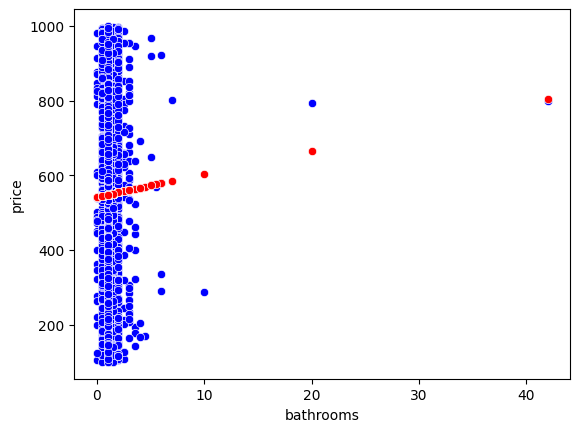

In [ ]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [ ]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00018861245245682667

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.013733624884087473)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

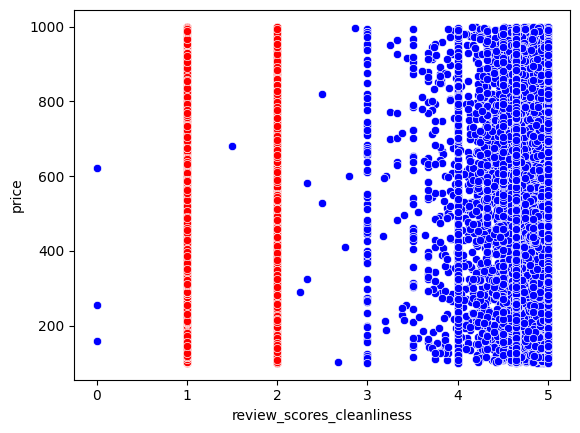

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

In [ ]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.52195506]),
 'rank_': 1,
 'singular_': array([37.0103645]),
 'intercept_': np.float64(564.6443495433429)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

2.7612325292802886e-05

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([548.26725852, 548.16159986, 547.73896526, ..., 547.03457425,
       548.26725852, 548.26725852], shape=(9055,))

In [ ]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0        548.267259     547.823601    551.244904  794.75                  2   
1        548.161600     547.823601    551.244904  130.44                  2   
2        547.738965     550.938899    536.567574  932.14                  1   
3        547.562868     547.823601    536.567574  365.00                  1   
4        548.302478     554.054197    536.567574  400.39                  1   
...             ...            ...           ...     ...                ...   
9050     548.267259     547.823601    551.244904  302.36                  2   
9051     548.267259     547.823601    551.244904  435.70                  2   
9052     547.034574     547.823601    551.244904  281.52                  2   
9053     548.267259     544.708303    551.244904  611.43                  2   
9054     548.267259     547.823601    551.244904  952.54                  2   

      host_acceptance_rate  room_type  accommodates  bathrooms  \
0             0.000000e+00          2             2        1.0   
1             9.900000e-07          2             2        1.0   
2             9.600000e-07          2             4        1.5   
3             9.400000e-07          2             2        1.0   
4             1.000000e-06          2             1        2.0   
...                    ...        ...           ...        ...   
9050          1.000000e-06          2             2        1.0   
9051          7.500000e-07          2             1        1.0   
9052          8.800000e-07          2             2        1.0   
9053          9.400000e-07          2             1        0.5   
9054          1.000000e-06          2             4        1.0   

      review_scores_cleanliness  host_identity_verified  instant_bookable  
0                          4.65                       2                 2  
1                          4.68                       1                 1  
2                          4.80                       1                 2  
3                          4.85                       1                 2  
4                          4.64                       1                 2  
...                         ...                     ...               ...  
9050                       4.65                       1                 2  
9051                       4.65                       1                 2  
9052                       5.00                       1                 2  
9053                       4.65                       1                 2  
9054                       4.65                       1                 2  

[9055 rows x 12 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

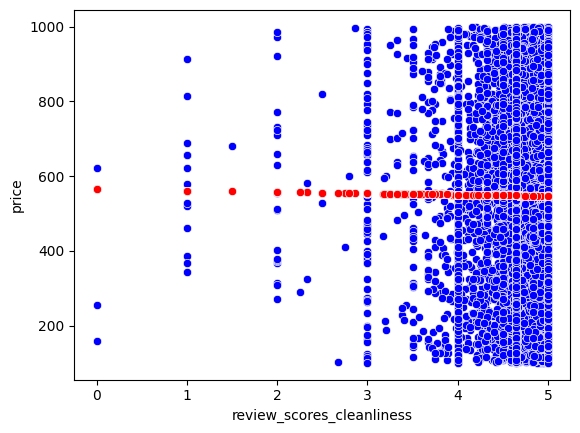

In [ ]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

In [ ]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

2.7612325292802886e-05

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0052547431233888955)

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

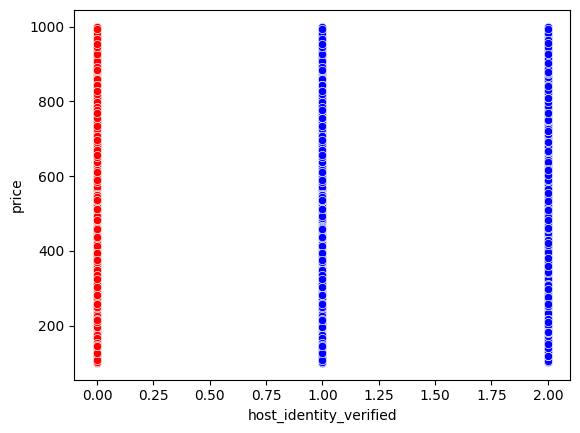

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [ ]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.36122063]),
 'rank_': 1,
 'singular_': array([31.08652715]),
 'intercept_': np.float64(550.87969580024)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

8.756008769150725e-06

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([546.15725455, 548.51847517, 548.51847517, ..., 548.51847517,
       548.51847517, 548.51847517], shape=(9055,))

In [ ]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0        546.157255     548.267259     547.823601    551.244904  794.75   
1        548.518475     548.161600     547.823601    551.244904  130.44   
2        548.518475     547.738965     550.938899    536.567574  932.14   
3        548.518475     547.562868     547.823601    536.567574  365.00   
4        548.518475     548.302478     554.054197    536.567574  400.39   
...             ...            ...            ...           ...     ...   
9050     548.518475     548.267259     547.823601    551.244904  302.36   
9051     548.518475     548.267259     547.823601    551.244904  435.70   
9052     548.518475     547.034574     547.823601    551.244904  281.52   
9053     548.518475     548.267259     544.708303    551.244904  611.43   
9054     548.518475     548.267259     547.823601    551.244904  952.54   

      host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                     2          0.000000e+00          2             2   
1                     2          9.900000e-07          2             2   
2                     1          9.600000e-07          2             4   
3                     1          9.400000e-07          2             2   
4                     1          1.000000e-06          2             1   
...                 ...                   ...        ...           ...   
9050                  2          1.000000e-06          2             2   
9051                  2          7.500000e-07          2             1   
9052                  2          8.800000e-07          2             2   
9053                  2          9.400000e-07          2             1   
9054                  2          1.000000e-06          2             4   

      bathrooms  review_scores_cleanliness  host_identity_verified  \
0           1.0                       4.65                       2   
1           1.0                       4.68                       1   
2           1.5                       4.80                       1   
3           1.0                       4.85                       1   
4           2.0                       4.64                       1   
...         ...                        ...                     ...   
9050        1.0                       4.65                       1   
9051        1.0                       4.65                       1   
9052        1.0                       5.00                       1   
9053        0.5                       4.65                       1   
9054        1.0                       4.65                       1   

      instant_bookable  
0                    2  
1                    1  
2                    2  
3                    2  
4                    2  
...                ...  
9050                 2  
9051                 2  
9052                 2  
9053                 2  
9054                 2  

[9055 rows x 13 columns]

<Axes: xlabel='host_identity_verified', ylabel='price'>

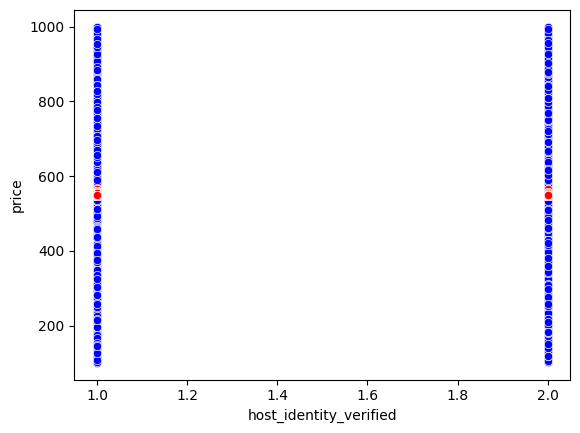

In [ ]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

In [ ]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

8.756008769150725e-06

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0029590553846034593)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

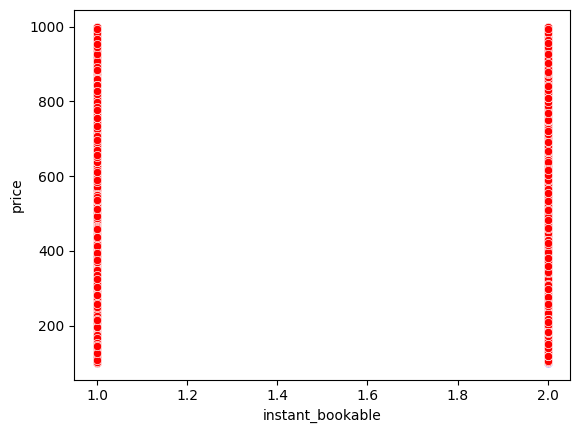

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [ ]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.27044711]),
 'rank_': 1,
 'singular_': array([43.51675547]),
 'intercept_': np.float64(553.7984374667227)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

3.291667132621079e-05

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([547.25754325, 550.52799036, 547.25754325, ..., 547.25754325,
       547.25754325, 547.25754325], shape=(9055,))

In [ ]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  \
0        547.257543     546.157255     548.267259     547.823601   
1        550.527990     548.518475     548.161600     547.823601   
2        547.257543     548.518475     547.738965     550.938899   
3        547.257543     548.518475     547.562868     547.823601   
4        547.257543     548.518475     548.302478     554.054197   
...             ...            ...            ...            ...   
9050     547.257543     548.518475     548.267259     547.823601   
9051     547.257543     548.518475     548.267259     547.823601   
9052     547.257543     548.518475     547.034574     547.823601   
9053     547.257543     548.518475     548.267259     544.708303   
9054     547.257543     548.518475     548.267259     547.823601   

      Predicciones   price  host_is_superhost  host_acceptance_rate  \
0       551.244904  794.75                  2          0.000000e+00   
1       551.244904  130.44                  2          9.900000e-07   
2       536.567574  932.14                  1          9.600000e-07   
3       536.567574  365.00                  1          9.400000e-07   
4       536.567574  400.39                  1          1.000000e-06   
...            ...     ...                ...                   ...   
9050    551.244904  302.36                  2          1.000000e-06   
9051    551.244904  435.70                  2          7.500000e-07   
9052    551.244904  281.52                  2          8.800000e-07   
9053    551.244904  611.43                  2          9.400000e-07   
9054    551.244904  952.54                  2          1.000000e-06   

      room_type  accommodates  bathrooms  review_scores_cleanliness  \
0             2             2        1.0                       4.65   
1             2             2        1.0                       4.68   
2             2             4        1.5                       4.80   
3             2             2        1.0                       4.85   
4             2             1        2.0                       4.64   
...         ...           ...        ...                        ...   
9050          2             2        1.0                       4.65   
9051          2             1        1.0                       4.65   
9052          2             2        1.0                       5.00   
9053          2             1        0.5                       4.65   
9054          2             4        1.0                       4.65   

      host_identity_verified  instant_bookable  
0                          2                 2  
1                          1                 1  
2                          1                 2  
3                          1                 2  
4                          1                 2  
...                      ...               ...  
9050                       1                 2  
9051                       1                 2  
9052                       1                 2  
9053                       1                 2  
9054                       1                 2  

[9055 rows x 14 columns]

<Axes: xlabel='instant_bookable', ylabel='price'>

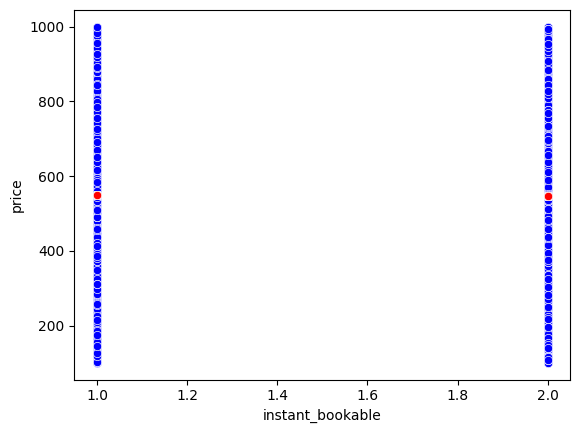

In [ ]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [ ]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

3.291667132621079e-05

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.005737305232093791)